In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.misc import face

In [8]:
def translate(image, vector):
    tlanslated = np.zeros_like(image)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            
            ni = i - vector[0]
            nj = j - vector[1]
            
            if ni < 0 or nj < 0:
                continue
                
            if ni >= image.shape[0] or nj >= image.shape[1]:
                continue
                
            tlanslated[ni, nj] = image[i, j]
    return tlanslated

In [9]:
raccon = face(True)
translated = translate(raccon, (-250, 450))

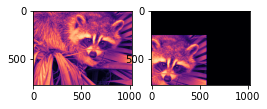

In [10]:
plt.figure()
plt.subplot(131)
plt.imshow(raccon, cmap='magma')
plt.subplot(132)
plt.imshow(translated, cmap='magma')

In [11]:
arr = np.array([[0,0,0,0,0,0,0,0,0,0],
                [0,0,0,0,0,0,0,0,0,0],
                [0,1,1,1,1,1,1,1,0,0],
                [0,0,0,0,1,1,1,1,0,0],
                [0,0,0,0,1,1,1,1,0,0],
                [0,0,0,1,1,1,1,1,0,0],
                [0,0,0,0,1,1,1,1,0,0],
                [0,0,0,1,1,0,0,0,0,0],
                [0,0,0,0,0,0,0,0,0,0],
                [0,0,0,0,0,0,0,0,0,0]])

In [12]:
struct = np.ones((3,2))

In [13]:
def dilation(image, mask = struct):
    
    result = np.zeros_like(image)
    for y in range(1, image.shape[0] - 1):
        for x in range(1, image.shape[1] - 1):
            
            rlog = np.logical_and(arr[y, x], mask)
            result[y-1:y+2, x-1:x+2] = np.logical_or(result[y-1:y+2, x-1:x+2], rlog)
            
    return result

In [14]:
def erosion(image, mask = struct):
        
    result = np.zeros_like(image)
    for y in range(1, image.shape[0] - 1):
        for x in range(1, image.shape[1] - 1):
            
            sub = image[y-1:y+2, x-1:x+2]
            if np.all(sub == mask):
                result[y, x] = 1
            
    return result

In [15]:
def closing(image, mask=struct):
    return erosion(dilation(image, mask), mask)

In [16]:
def opening(image, mask=struct):
    return dilation(erosion(image, mask), mask)

ValueError: operands could not be broadcast together with shapes (3,3) (3,2) 

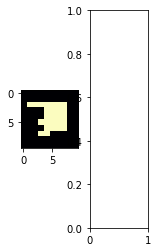

In [17]:
plt.figure()
plt.subplot(151)
plt.imshow(arr, cmap='magma')
plt.subplot(152)
plt.imshow(dilation(arr), cmap='magma')
plt.subplot(153)
plt.imshow(erosion(arr), cmap='magma')
plt.subplot(154)
plt.imshow(closing(arr), cmap='magma')
plt.subplot(155)
plt.imshow(opening(arr), cmap='magma')

In [18]:
from scipy.ndimage import morphology

In [19]:
def neighbours(y, x):
    return (y, x-1),(y, x+1),(y-1, x),(y+1, x)

def negate(B):
    array = B.copy()
    return array*-1

def search(LB, label, y, x):
    LB[y, x] = label 
    for ny, nx in neighbours(y, x):
        if LB[ny, nx] == -1:
            search(LB, label, ny, nx)
            
def recursive_label(B):
    image_bounded = np.zeros((B.shape[0]+2, B.shape[1]+2)).astype('uint8')
    image_bounded[1:-1, 1:-1] = B
    
    LB = negate(image_bounded)
    label = 0 
    for y in range(LB.shape[0]):
        for x in range(LB.shape[1]):
            if LB[y, x] == -1:
                label += 1
                search(LB, label, y, x)
    return LB[1:-1, 1:-1]

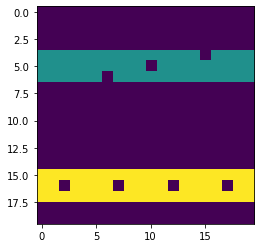

In [20]:
image = np.load('src/wires5.npy.txt')
label1 = recursive_label(image)
plt.imshow(label1)

In [21]:
for i in range(1, np.max(label1)+1):
    one_wire_image = np.zeros_like(label1)
    one_wire_image[label1 == i] = 1
    
    result = recursive_label(morphology.binary_erosion(one_wire_image, struct))
    print(np.max(result))

4
5


In [23]:
mask1 = np.array([[0,0,1,0,0],
                  [0,0,1,0,0],
                  [1,1,1,1,1],
                  [0,0,1,0,0],
                  [0,0,1,0,0]]) 

mask2 = np.array([[1,0,0,0,1],
                  [0,1,0,1,0],
                  [0,0,1,0,0],
                  [0,1,0,1,0],
                  [1,0,0,0,1]])

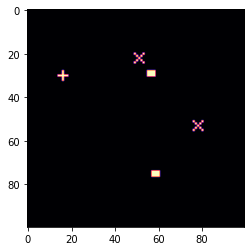

In [28]:
stars = np.load('src/stars.npy.txt')
plt.imshow(stars[100:200, 100:200], cmap='magma')

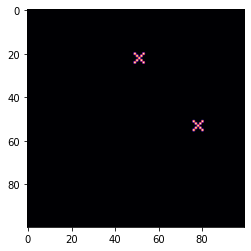

In [33]:
diags = morphology.binary_opening(stars, mask2)
plt.imshow(diags[100:200, 100:200], cmap='magma')

In [35]:
np.sum(mask1)

9

In [26]:
pluses = morphology.binary_opening(stars, mask1)
# plt.imshow(pluses[100:200, 100:200], cmap='magma')

In [27]:
print('pluses:', np.sum(pluses)/np.sum(mask1))
print('diags:', np.sum(diags)/np.sum(mask2))

pluses: 71.0
diags: 90.0
